<a href="https://colab.research.google.com/github/RafaelSdeSouza/DataScience/blob/main/7PAM1035_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

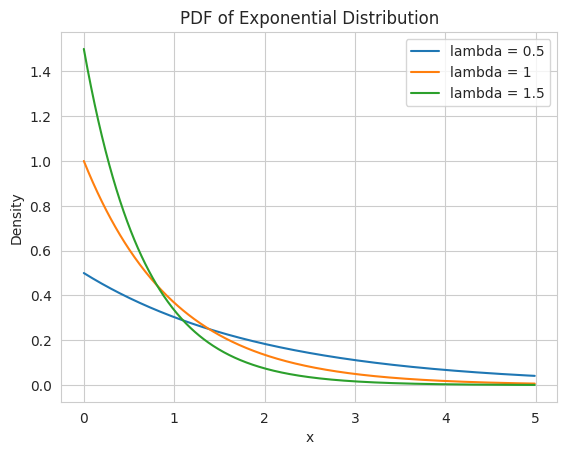

In [ ]:
# Set the style
sns.set_style("whitegrid")

# Exponential Distribution
## 1. Plotting the PDF for different lambda values
x_seq = np.arange(0, 5, 0.01)
lambda_vals = [0.5, 1, 1.5]

for l in lambda_vals:
    plt.plot(x_seq, np.exp(-l * x_seq) * l, label=f"lambda = {l}")

plt.title("PDF of Exponential Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

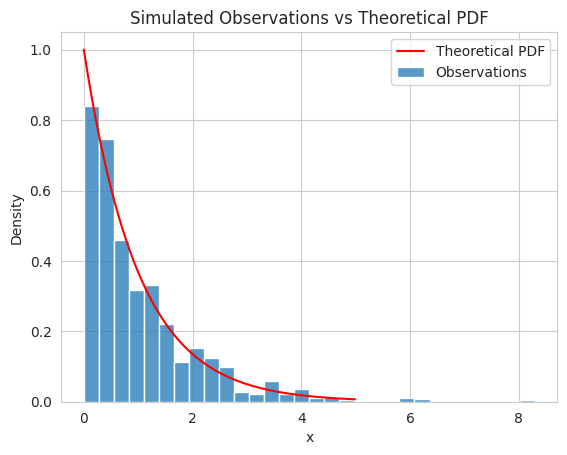

In [ ]:
## 2. Simulating observations and plotting histogram
lambda_specified = 1
observations = np.random.exponential(1/lambda_specified, 1000)

sns.histplot(observations, kde=False, bins=30, stat="density", label="Observations")
plt.plot(x_seq, np.exp(-lambda_specified * x_seq) * lambda_specified, color="red", label="Theoretical PDF")
plt.title("Simulated Observations vs Theoretical PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()



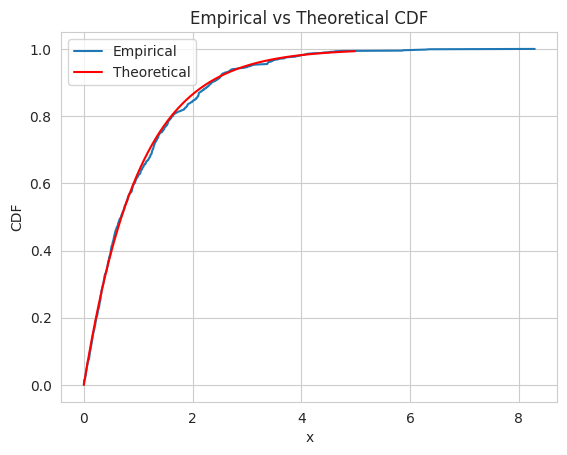

In [ ]:
## 3. Comparing empirical CDF with theoretical CDF
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(observations)
plt.plot(ecdf.x, ecdf.y, label="Empirical")
plt.plot(x_seq, 1 - np.exp(-lambda_specified * x_seq), color="red", label="Theoretical")
plt.title("Empirical vs Theoretical CDF")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.show()



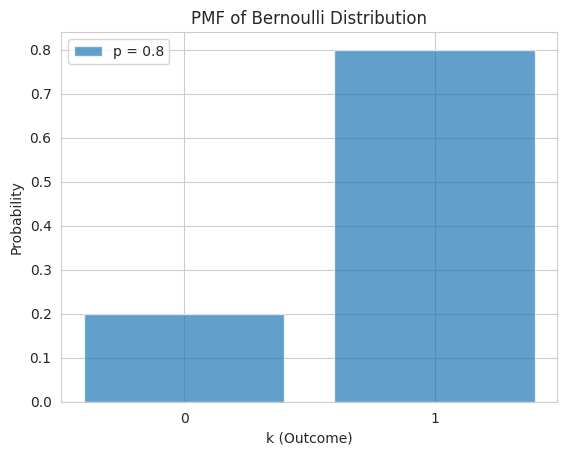

In [ ]:
# Bernoulli Distribution
## 1. Plotting the PMF
p_values = [0.8]
k_seq = [0, 1]

for p in p_values:
    plt.bar(k_seq, [1-p, p], alpha=0.7, label=f"p = {p}")

plt.title("PMF of Bernoulli Distribution")
plt.xlabel("k (Outcome)")
plt.ylabel("Probability")
plt.xticks(k_seq, ["0", "1"])
plt.legend()
plt.show()

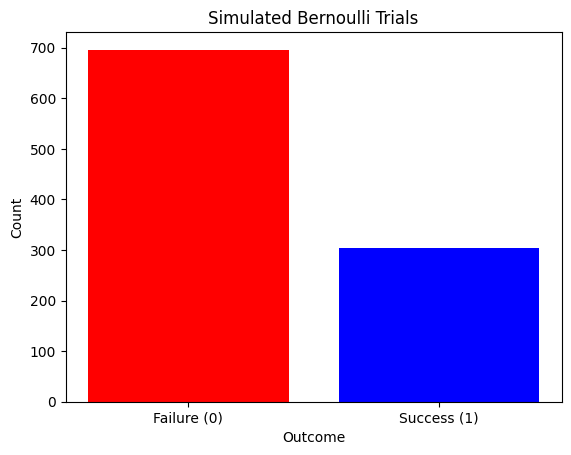

In [ ]:
## 2. Simulating observations and plotting bar chart
p_specified = 0.3
bernoulli_trials = np.random.binomial(1, p_specified, 1000)
values, counts = np.unique(bernoulli_trials, return_counts=True)

plt.bar(values, counts, color=["red", "blue"], tick_label=["Failure (0)", "Success (1)"])
plt.title("Simulated Bernoulli Trials")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

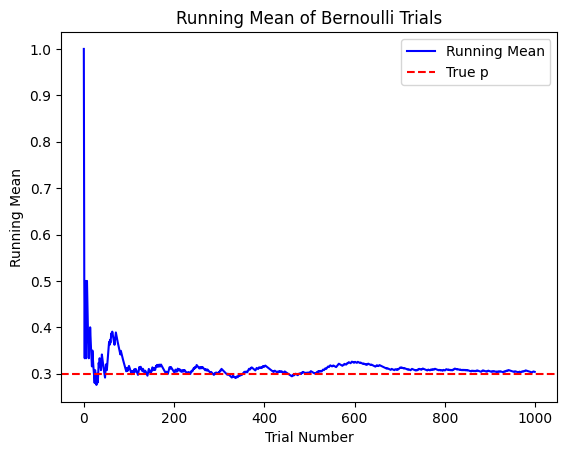

In [ ]:
## 3. Visualizing the running mean
running_mean = np.cumsum(bernoulli_trials) / np.arange(1, len(bernoulli_trials) + 1)

plt.plot(running_mean, color="blue", label="Running Mean")
plt.axhline(y=p_specified, color="red", linestyle="--", label="True p")
plt.title("Running Mean of Bernoulli Trials")
plt.xlabel("Trial Number")
plt.ylabel("Running Mean")
plt.legend()
plt.show()

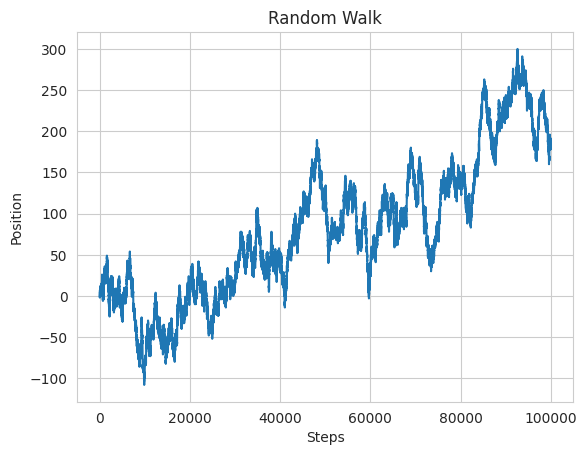

In [ ]:
# Random Walk Example
steps = np.random.choice([-1, 1], size=100)
random_walk = np.cumsum(steps)
plt.plot(random_walk)
plt.title("Random Walk")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.show()

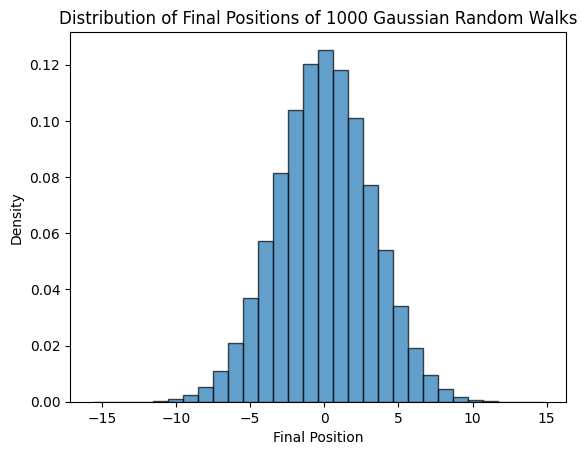

In [ ]:
# Number of steps and walks
N = 10
num_walks = 1000000
# Final positions of all walks
final_positions = []

for _ in range(num_walks):
    steps = np.random.normal(loc=0, scale=1, size=N)
    walk = np.cumsum(steps)
    final_positions.append(walk[-1])  # last position of each walk

# Plotting the histogram of final positions
plt.hist(final_positions, bins=30, edgecolor='k', alpha=0.7, density=True)
plt.title("Distribution of Final Positions of 1000 Gaussian Random Walks")
plt.xlabel("Final Position")
plt.ylabel("Density")
plt.show()

# We're investigating the expected value of the smallest length when a stick of length 1 is broken at two random points $X$ and $Y$.

# Without loss of generality, let's assume $(X \leq Y)$.

The three lengths formed by breaking the stick at $X$ and $Y$ are:
# 1. $X$
# 2. $Y - X$
# 3. $1 - Y$

# The function for the smallest length is a piecewise function:

## $ \text{smallest}(X, Y) =
 \begin{cases}
 X & \text{if } X \leq Y - X \text{ and } X \leq 1 - Y \\
 Y - X & \text{if } Y - X \leq X \text{ and } Y - X \leq 1 - Y \\
 1 - Y & \text{if } 1 - Y \leq X \text{ and } 1 - Y \leq Y - X
 \end{cases}$

# To find the expected value of the smallest piece, we'll compute:

## $
E[\text{smallest}(X, Y)] = \int_{0}^{1} \int_{0}^{1} \text{smallest}(X, Y) \, dX \, dY
$

# This overall integral can be broken down into three double integrals due to the piecewise nature of our function.

# 1. When \(X\) is the smallest:
## $
 \int_{0}^{1/2} \int_{2X}^{1} X \, dY \, dX
 $

# 2. When \(Y - X\) is the smallest:
# $
 \int_{0}^{1/2} \int_{X}^{2X} (Y - X) \, dY \, dX
 $

# 3. When \(1 - Y\) is the smallest:
# $
 \int_{1/2}^{1} \int_{0}^{1-Y} (1 - Y) \, dX \, dY
 $

# The total expected value is the sum of these three integrals.

# The Python code bellow utilizes the `dblquad` function to compute this integral over the entire domain, taking into account all the cases of the piecewise function.


In [ ]:
from scipy.integrate import dblquad

# Define the function for the smallest part
def smallest(x, y):
    if x > y:
        x, y = y, x
    return min(x, y-x, 1-y)

# Define the function for the largest part
def largest(x, y):
    if x > y:
        x, y = y, x
    return max(x, y-x, 1-y)

# Calculate expected value for the smallest part
area_smallest, _ = dblquad(lambda y, x: smallest(x, y), 0, 1, lambda x: 0, lambda x: 1)

# Calculate expected value for the largest part
area_largest, _ = dblquad(lambda y, x: largest(x, y), 0, 1, lambda x: 0, lambda x: 1)

print(f"Expected value of the smallest part: {area_smallest:.4f}")
print(f"Expected value of the largest part: {area_largest:.4f}")


Expected value of the smallest part: 0.1111
Expected value of the largest part: 0.6111


In [ ]:
import numpy as np

num_trials = 10000
smallest_lengths = []
largest_lengths = []

for _ in range(num_trials):
    # Sample two break points
    x, y = np.sort(np.random.uniform(0, 1, 2))

    # Calculate the three lengths
    lengths = [x, y - x, 1 - y]

    # Track smallest and largest lengths
    smallest_lengths.append(min(lengths))
    largest_lengths.append(max(lengths))

# Calculate the average of smallest and largest lengths
expected_smallest = np.mean(smallest_lengths)
expected_largest = np.mean(largest_lengths)

print(f"Experimental expected value of the smallest part: {expected_smallest:.4f}")
print(f"Experimental expected value of the largest part: {expected_largest:.4f}")



Experimental expected value of the smallest part: 0.1114
Experimental expected value of the largest part: 0.6112
